In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Experimento1

In [3]:
df_exp1 = pd.read_csv("resultados/exp-1.csv");

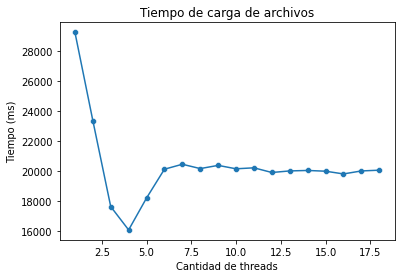

In [33]:
fig = sns.scatterplot(data=df_exp1, x="cant_threads", y="tiempo_carga")
fig = sns.lineplot(data=df_exp1, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos")
plt.savefig("graficos/cant-threads-vs-tiempo-carga.svg");

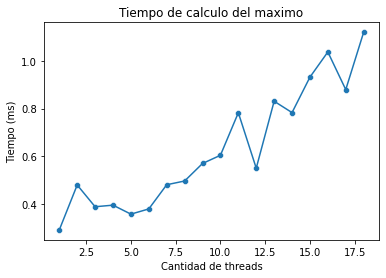

In [34]:
fig = sns.scatterplot(data=df_exp1, x="cant_threads", y="tiempo_max")
fig = sns.lineplot(data=df_exp1, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de calculo del maximo")
plt.savefig("graficos/cant-threads-vs-tiempo-max.svg");

## Experimento 2

In [ ]:
df_exp2 = pd.read_csv("resultados/experimento_separados.csv")

In [18]:
cant_archivos = []
for i in range(1, 11):
    n = 2**i
    for j in range(19):
        cant_archivos.append(n)
df_exp2["cant_archivos"] = cant_archivos

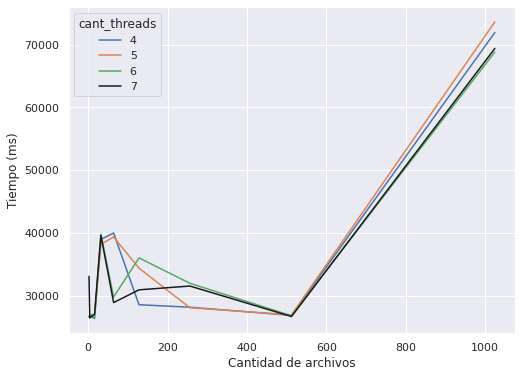

In [52]:
df_exp2_aux = df_exp2[(df_exp2["cant_threads"] > 3) & (df_exp2["cant_threads"] < 8)]
fig = sns.lineplot(data=df_exp2_aux, x="cant_archivos", y="tiempo_carga", hue="cant_threads", palette=["C0", "C1", "C2", "k"])
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2.svg");

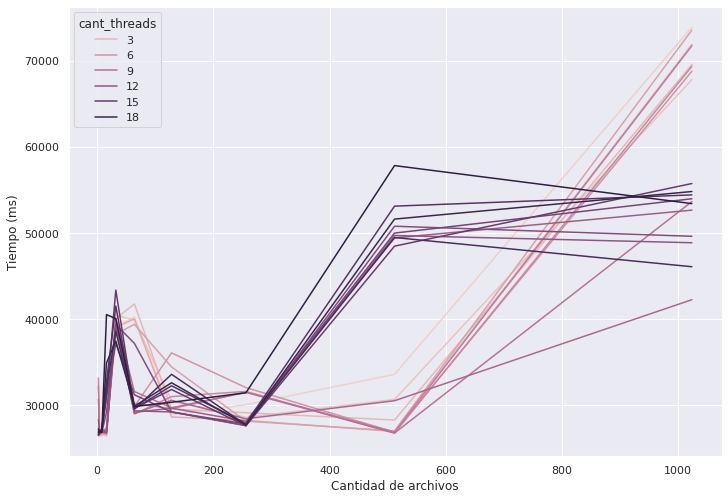

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.lineplot(data=df_exp2, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2.svg");

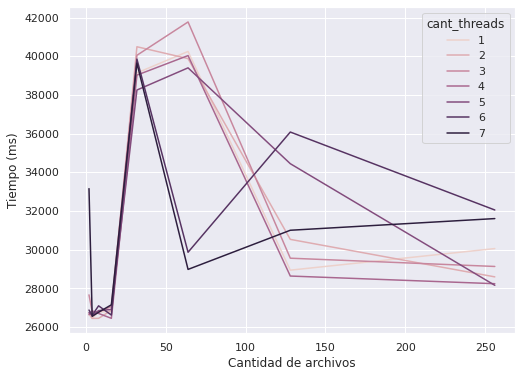

In [62]:
df_exp2_aux1 = df_exp2[(df_exp2["cant_threads"] < 8) & (df_exp2["cant_archivos"] < 300)]
fig = sns.lineplot(data=df_exp2_aux1, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2-baja.svg");

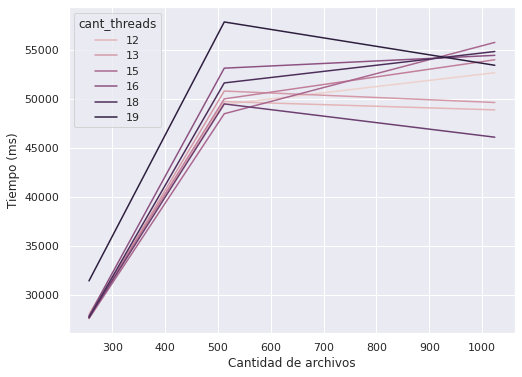

In [65]:
df_exp2_aux1 = df_exp2[(df_exp2["cant_threads"] > 10) & (df_exp2["cant_archivos"] > 200)]
fig = sns.lineplot(data=df_exp2_aux1, x="cant_archivos", y="tiempo_carga", hue="cant_threads")
fig.set(xlabel='Cantidad de archivos', ylabel='Tiempo (ms)');
plt.savefig("graficos/exp2-alta.svg");

# Experimento 3

## Experimento 3.1

In [23]:
df_exp31 = pd.read_csv("resultados/exp-31.csv");
mean_carga = df_exp31["tiempo_carga"]
sd_carga = np.sqrt(df_exp31["varianza_carga"])
mean_maximo = df_exp31["tiempo_max"]
sd_max = np.sqrt(df_exp31["varianza_max"])

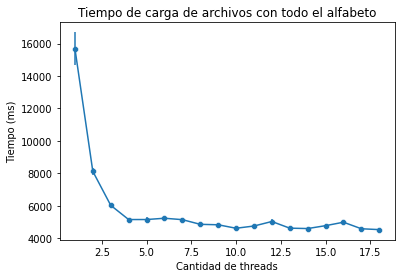

In [31]:
fig = sns.scatterplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos con todo el alfabeto")
fig.errorbar(df_exp31["cant_threads"],mean_carga,yerr=sd_carga)
plt.savefig("graficos/cant-threads-vs-tiempo-carga-alf1.svg");

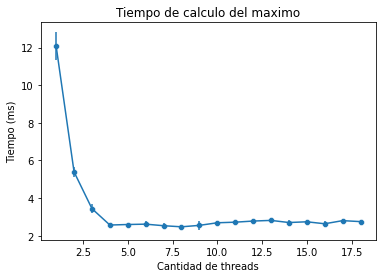

In [32]:
fig = sns.scatterplot(data=df_exp31, x="cant_threads", y="tiempo_max")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de calculo del maximo con todo el alfabeto")
fig.errorbar(df_exp31["cant_threads"],mean_maximo,yerr=sd_max)
plt.savefig("graficos/cant-threads-vs-tiempo-max-alf1.svg");

## Experimento 3.2

In [35]:
df_exp32 = pd.read_csv("resultados/exp-32.csv");
mean_carga = df_exp32["tiempo_carga"]
sd_carga = np.sqrt(df_exp32["varianza_carga"])
mean_maximo = df_exp32["tiempo_max"]
sd_max = np.sqrt(df_exp32["varianza_max"])

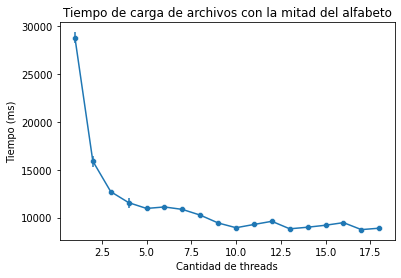

In [36]:
fig = sns.scatterplot(data=df_exp32, x="cant_threads", y="tiempo_carga")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos con la mitad del alfabeto")
fig.errorbar(df_exp32["cant_threads"],mean_carga,yerr=sd_carga)
plt.savefig("graficos/cant-threads-vs-tiempo-carga-alf2.svg");

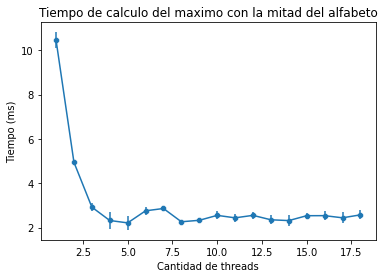

In [37]:
fig = sns.scatterplot(data=df_exp32, x="cant_threads", y="tiempo_max")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de calculo del maximo con la mitad del alfabeto")
fig.errorbar(df_exp32["cant_threads"],mean_maximo,yerr=sd_max)
plt.savefig("graficos/cant-threads-vs-tiempo-max-alf2.svg");

## Experimento 3.3

In [38]:
df_exp33 = pd.read_csv("resultados/exp-33.csv");
mean_carga = df_exp33["tiempo_carga"]
sd_carga = np.sqrt(df_exp33["varianza_carga"])
mean_maximo = df_exp33["tiempo_max"]
sd_max = np.sqrt(df_exp33["varianza_max"])

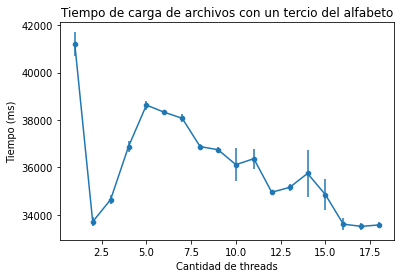

In [39]:
fig = sns.scatterplot(data=df_exp33, x="cant_threads", y="tiempo_carga")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_carga")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de carga de archivos con un tercio del alfabeto")
fig.errorbar(df_exp33["cant_threads"],mean_carga,yerr=sd_carga)
plt.savefig("graficos/cant-threads-vs-tiempo-carga-alf3.svg");

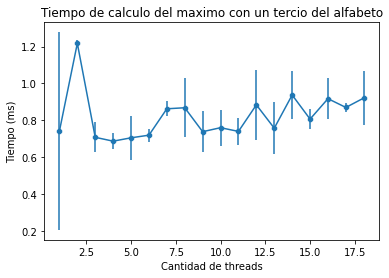

In [40]:
fig = sns.scatterplot(data=df_exp33, x="cant_threads", y="tiempo_max")
#fig = sns.lineplot(data=df_exp31, x="cant_threads", y="tiempo_max")
fig.set(xlabel='Cantidad de threads', ylabel='Tiempo (ms)');
fig.set_title("Tiempo de calculo del maximo con un tercio del alfabeto")
fig.errorbar(df_exp33["cant_threads"],mean_maximo,yerr=sd_max)
plt.savefig("graficos/cant-threads-vs-tiempo-max-alf3.svg");